In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from tqdm import tqdm

# Important Variables

Datasets: 
- anime_data: dataframe containing the "anime_marlesson_jan20.csv"
- users: dataframe containing the "profiles_marlesson_jan20.csv" 
- user_reviews: dataframe with merged users profiles and the reviews they gave 

Dataframes: 
- female_users: dataframe containing all female users
- male_users: dataframe containing all male users 

Others:
- genre_indicator: dummy values for genre 
- gender_indicator: dummy values for gender 

# Importing Datasets

In [49]:
#importing "anime_marlesson_jan20.csv"
anime_data = pd.read_csv("animes_marlesson_jan20.csv")
print("Number of Columns in anime_data: " + str(len(anime_data.columns)))
print("Number of Observations in anime_data: " + str(len(anime_data)))
#importing "profiles_marlesson_jan20.csv"
users = pd.read_csv("profiles_marlesson_jan20.csv")
print("\nNumber of Columns in users: " + str(len(users.columns)))
print("Number of Observations in users: " + str(len(users)))


Number of Columns in anime_data: 12
Number of Observations in anime_data: 19311

Number of Columns in users: 5
Number of Observations in users: 81727


# Cleaning Data: anime_data

In [50]:
#anime_data = anime_data.dropna()
anime_data = anime_data.drop(columns = ['img_url', 'link'])
anime_data = anime_data.rename(columns = {'score':'rating'}) 
print("Number of Columns After Cleaning Data: " + str(len(anime_data.columns)))
print("Number of Observations After Cleaning Data: " + str(len(anime_data)))
anime_data.head()

Number of Columns After Cleaning Data: 10
Number of Observations After Cleaning Data: 19311


,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,rating
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83


### Creating "aired_year" column

In [51]:
# Adding a new column to represent the aired year 
# Cases: month, year ; Not available ; just 1 year ; 20xx to 20xx 
aired_years = [] 
for dates in anime_data['aired']: 
    if dates == "Not available":
        aired_years.append(np.nan)
    elif len(dates) > 4 and dates[0].isalpha():
        start = dates.index(",") + 2 
        year = dates[start:start+4] #gets the first year  
        aired_years.append(int(year))
    else:
        aired_years.append(dates[0:3])
anime_data['aired_year'] = aired_years
#anime_data = anime_data.dropna()
print("Number of observations after dropping anime without aired_year: " + str(len(anime_data)))
print("Below are the first 5 rows of the dataset with the new column 'aired_year' ")
anime_data.head()

Number of observations after dropping anime without aired_year: 19311
Below are the first 5 rows of the dataset with the new column 'aired_year' 


,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,rating,aired_year
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,2015
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,2014
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,2017
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,2009
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83,2017


# Cleaning Data: users

In [52]:
users = users.dropna()
users = users.rename(columns = {'favorites_anime':'favorites'}) 
print("Number of Columns After Cleaning Data: " + str(len(users.columns)))
print("Number of Observations After Cleaning Data: " + str(len(users)))

Number of Columns After Cleaning Data: 5
Number of Observations After Cleaning Data: 43636


In [53]:
birth_years = []
for birthday in users['birthday']: #str 
    if "," in birthday:
        comma_index = birthday.index(',') 
        year = birthday[comma_index + 2:]
        birth_years.append(year)
    else: 
        birth_years.append(np.nan)
users['birth_year']  = birth_years
#dropping users without a birth year
users = users.dropna()
print("Number of users after dropping users without birth year: " + str(len(users)))
users = users.drop(columns = ['birthday'])
#resetting the index 
users = users.reset_index(drop = True)
users.head()

Number of users after dropping users without birth year: 34550


,profile,gender,favorites,link,birth_year
0,DesolatePsyche,Male,"['33352', '25013', '5530', '33674', '1482', '2...",https://myanimelist.net/profile/DesolatePsyche,1994
1,baekbeans,Female,"['11061', '31964', '853', '20583', '918', '925...",https://myanimelist.net/profile/baekbeans,2000
2,aManOfCulture99,Male,"['4181', '7791', '9617', '5680', '2167', '4382...",https://myanimelist.net/profile/aManOfCulture99,1999
3,NIGGER_BONER,Male,"['11061', '30', '6594', '28701', '10087', '674...",https://myanimelist.net/profile/NIGGER_BONER,1985
4,jchang,Male,"['846', '2904', '5114', '2924', '72']",https://myanimelist.net/profile/jchang,1992


# Summary of Data Sets After Cleaning

## anime_data

In [54]:
print("Number of columns: " + str(len(anime_data.columns)))
print("Column names:") 
for column in anime_data.columns: 
    print(column)
print("Number of observations (anime): " + str(len(anime_data)))

Number of columns: 11
Column names:
uid
title
synopsis
genre
aired
episodes
members
popularity
ranked
rating
aired_year
Number of observations (anime): 19311


## users

In [55]:
print("Number of columns: " + str(len(users.columns)))
print("Column names:")
for column in users.columns:
    print(column)
print("Number of observations (users): " + str(len(users)))

Number of columns: 5
Column names:
profile
gender
favorites
link
birth_year
Number of observations (users): 34550


# Merging user and user reviews

In [56]:
reviews = pd.read_csv("reviews.csv")
user_reviews = pd.merge(users, reviews, on = "profile")
user_reviews = user_reviews.drop(columns = ['link_x', 'link_y'])
user_reviews.head()

,profile,gender,favorites,birth_year,uid,anime_uid,text,score,scores
0,DesolatePsyche,Male,"['33352', '25013', '5530', '33674', '1482', '2...",1994,255938,34096,\n \n \n \n ...,8,"{'Overall': '8', 'Story': '8', 'Animation': '8..."
1,DesolatePsyche,Male,"['33352', '25013', '5530', '33674', '1482', '2...",1994,255793,12403,\n \n \n \n ...,6,"{'Overall': '6', 'Story': '6', 'Animation': '9..."
2,DesolatePsyche,Male,"['33352', '25013', '5530', '33674', '1482', '2...",1994,298207,35073,\n \n \n \n ...,6,"{'Overall': '6', 'Story': '6', 'Animation': '8..."
3,DesolatePsyche,Male,"['33352', '25013', '5530', '33674', '1482', '2...",1994,255795,23225,\n \n \n \n ...,7,"{'Overall': '7', 'Story': '8', 'Animation': '9..."
4,DesolatePsyche,Male,"['33352', '25013', '5530', '33674', '1482', '2...",1994,291256,2035,\n \n \n \n ...,8,"{'Overall': '8', 'Story': '9', 'Animation': '7..."


# Exploratory Analyses: 

### Gender Distribution

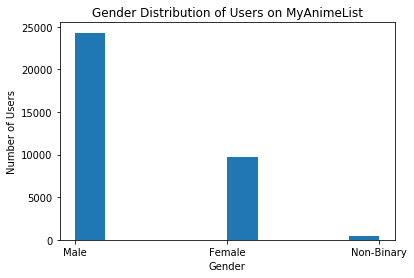

In [57]:
plt.hist(users['gender'])
plt.title("Gender Distribution of Users on MyAnimeList")
plt.xlabel("Gender") and plt.ylabel("Number of Users")
plt.show()

### Age Distribution of Users 

In [58]:
#converting the year (str) to year (int)
for i in range(len(users['birth_year'])):
    users['birth_year'][i] = int(users['birth_year'][i])

Text(0, 0.5, 'Number of Users')

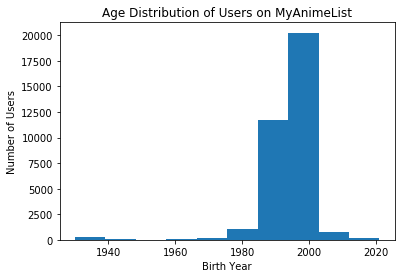

In [59]:
plt.hist(users['birth_year'].values)
plt.title("Age Distribution of Users on MyAnimeList")
plt.xlabel("Birth Year") and plt.ylabel("Number of Users")

### Extracting anime ID from the Users' String of Anime Favorites

In [60]:
### function to extract uid from string
def extract_uid(string): 
    final_list = []
    if '[]' not in string: #ignoring empty lists
        fav_list = string.strip('[]')
        fav_list = fav_list.split("'")
        for anime_id in fav_list:
            if anime_id.isdigit():
                final_list.append(int(anime_id))
    return(final_list)

In [61]:
#Running function on all users' favorites 
fav_lists = []
for each in users['favorites']:
    fav_lists.append(extract_uid(each))
users['favorites'] = fav_lists

### Genres and their Counts

In [62]:
genre_dict = {}
for anime_tags in anime_data['genre']:
    anime_tags = ast.literal_eval(anime_tags)
    for genre in anime_tags:
        if genre not in genre_dict: 
            genre_dict[genre] = 1 
        else:
            genre_dict[genre] += 1 
print("Number of Unique Anime Genres: " + str(len(genre_dict)))

Number of Unique Anime Genres: 43


In [63]:
genres =[key for key in genre_dict]
genre_counts=[genre_dict[key] for key in genre_dict]

In [64]:
genre_distribution = pd.DataFrame(columns = ['genre', 'counts'])
genre_distribution['genre'] = genres
genre_distribution['counts'] = genre_counts
genre_distribution = genre_distribution.sort_values(by = 'counts', ascending = False)
genre_distribution = genre_distribution.reset_index(drop = True)
genre_distribution

,genre,counts
0,Comedy,6461
1,Action,4215
2,Fantasy,3466
3,Adventure,3143
4,Drama,3004
5,Sci-Fi,2832
6,Hentai,2574
7,Kids,2549
8,Shounen,2322
9,Romance,2152


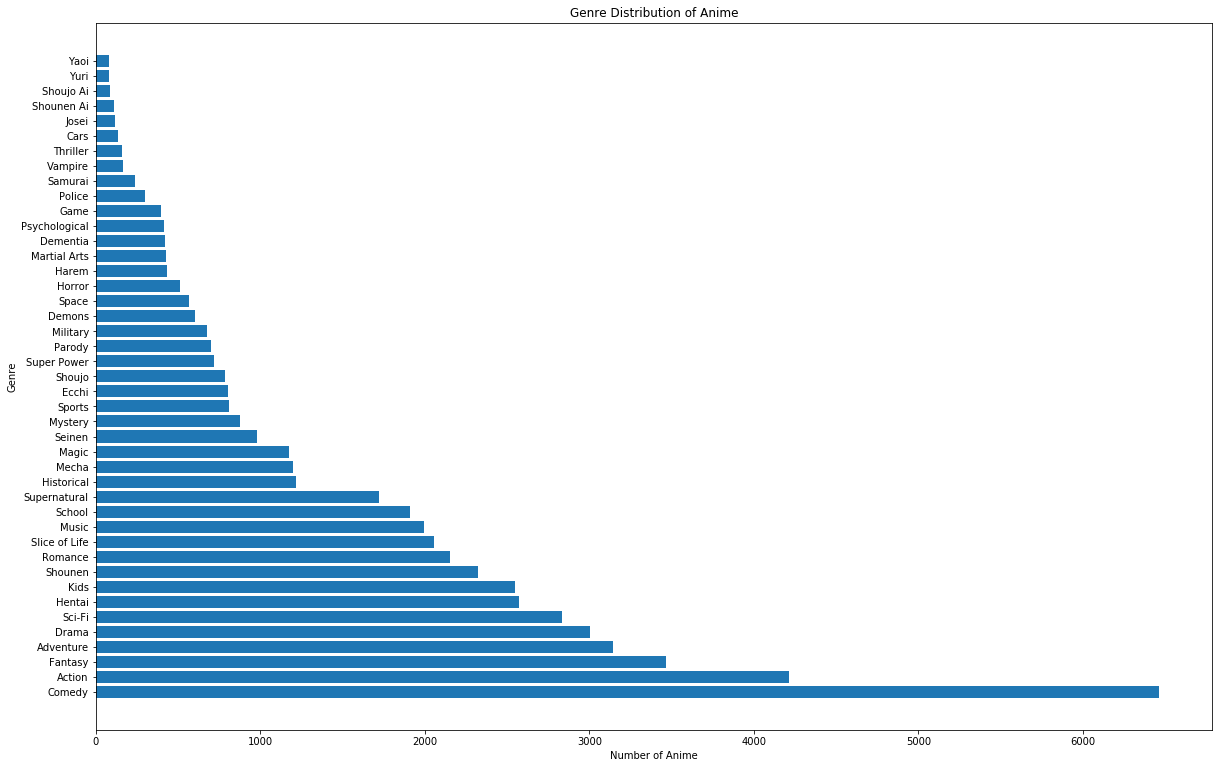

In [65]:
f, ax = plt.subplots(1, 1, figsize = (20, 13))
plt.barh(genre_distribution['genre'], genre_distribution['counts'])
plt.title("Genre Distribution of Anime")
plt.xlabel("Number of Anime") and plt.ylabel("Genre")
plt.show()

In [66]:
#reference: https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html 
#fig1, ax1 = plt.subplots()
#ax1.pie(genre_counts, labels= genres, autopct='%1.1f%%', startangle=90, radius = 20)
#plt.title("Distribution of Anime Genres")
#plt.show()

# Data Analysis: Gender Differences in Anime Genre Preference

In [67]:
#dummy for gender and genre 
genre_indicator = pd.get_dummies(genres)
gender_indicator = pd.get_dummies(users['gender']) #1 = female, 0 = male 
users['gender'] = gender_indicator

In [68]:
#separate dataset for male v. female users
female_users = users[users.gender == 1 ]
male_users = users[users.gender == 0]

In [69]:
#pd Series containing all female favorites 
female_favs = []
for user in female_users['favorites']: 
    for anime in user:
        female_favs.append(anime)
female_favs = pd.Series(female_favs)

#pd Series containing the all male favorites 
male_favs = []
for user in male_users['favorites']: 
    for anime in user:
        male_favs.append(anime)
male_favs = pd.Series(male_favs)

### Top 10 Male vs. Female Favorites

In [70]:
ff_count = female_favs.value_counts().index.tolist()
print("Anime ID of Top 10 female favorites: ")
ff_count = ff_count[0:10]
print(ff_count[0:9])

Anime ID of Top 10 female favorites: 
[5114, 1535, 853, 11061, 16498, 9756, 9253, 21, 1575]


In [71]:
top10_titles = []
f_top10_df = pd.DataFrame(columns = ['uid', 'title'])
f_top10_df['uid'] = ff_count
for anime_id in ff_count: 
    anime = anime_data[anime_data.uid == anime_id].drop_duplicates() 
    index = anime.index[0]
    title = anime_data['title'][index]
    top10_titles.append(title)
f_top10_df['title'] = top10_titles
print("Top 10 Female Favorites (Ordered from Most Counts to Least Counts):")
f_top10_df.head(10)

Top 10 Female Favorites (Ordered from Most Counts to Least Counts):


,uid,title
0,5114,Fullmetal Alchemist: Brotherhood
1,1535,Death Note
2,853,Ouran Koukou Host Club
3,11061,Hunter x Hunter (2011)
4,16498,Shingeki no Kyojin
5,9756,Mahou Shoujo Madoka★Magica
6,9253,Steins;Gate
7,21,One Piece
8,1575,Code Geass: Hangyaku no Lelouch
9,20583,Haikyuu!!


In [72]:
mf_count = male_favs.value_counts().index.tolist()
print("Anime ID of Top 10 male favorites: ")
mf_count = mf_count[0:10]
print(mf_count[0:9])

#titles of top10
top10_titles = []
m_top10_df = pd.DataFrame(columns = ['uid', 'title'])
m_top10_df['uid'] = mf_count
for anime_id in mf_count: 
    anime = anime_data[anime_data.uid == anime_id].drop_duplicates() 
    index = anime.index[0]
    title = anime_data['title'][index]
    top10_titles.append(title)
m_top10_df['title'] = top10_titles
print("\nTop 10 Male Favorites (Ordered from Most Counts to Least Counts):")
m_top10_df.head(10)

Anime ID of Top 10 male favorites: 
[9253, 5114, 4181, 1535, 2001, 11061, 1575, 1, 30]

Top 10 Male Favorites (Ordered from Most Counts to Least Counts):


,uid,title
0,9253,Steins;Gate
1,5114,Fullmetal Alchemist: Brotherhood
2,4181,Clannad: After Story
3,1535,Death Note
4,2001,Tengen Toppa Gurren Lagann
5,11061,Hunter x Hunter (2011)
6,1575,Code Geass: Hangyaku no Lelouch
7,1,Cowboy Bebop
8,30,Neon Genesis Evangelion
9,21,One Piece


### Genres Top 10 Favorites for Males v. Females

In [73]:
mtop10_genres = []
for uid in m_top10_df['uid']:
    anime = anime_data[anime_data.uid == uid].drop_duplicates()
    index = anime.index[0]
    anime_genres = anime_data['genre'][index]
    anime_genres = anime_genres.strip("[]")
    anime_genres = anime_genres.split(", ")
    for i in range(len(anime_genres)):
        anime_genres[i] = anime_genres[i].strip("''")
        mtop10_genres.append(anime_genres[i])
mtop10_genres = pd.Series(mtop10_genres) #all genre tags of male top10 
print("Top 10 Most observed genres of the top 10 male favorites: ")
mgenres = mtop10_genres.value_counts()[:10]
print(mgenres)

Top 10 Most observed genres of the top 10 male favorites: 
Action           7
Drama            6
Adventure        5
Sci-Fi           5
Comedy           5
Shounen          4
Super Power      3
Fantasy          3
Mecha            3
Psychological    2
dtype: int64


In [74]:
ftop10_genres = []
for uid in f_top10_df['uid']:
    anime = anime_data[anime_data.uid == uid].drop_duplicates()
    index = anime.index[0]
    anime_genres = anime_data['genre'][index]
    anime_genres = anime_genres.strip("[]")
    anime_genres = anime_genres.split(", ")
    for i in range(len(anime_genres)):
        anime_genres[i] = anime_genres[i].strip("''")
        ftop10_genres.append(anime_genres[i])
ftop10_genres = pd.Series(ftop10_genres) #all genre tags of male top10 
print("Top 10 Most observed genres of the top 10 female favorites: ")
fgenres = ftop10_genres.value_counts()[:10]
print(fgenres)

Top 10 Most observed genres of the top 10 female favorites: 
Drama          6
Shounen        6
Action         5
Fantasy        4
Comedy         4
Super Power    4
School         3
Thriller       3
Military       3
Adventure      3
dtype: int64


In [75]:
female_favs # do genre count for female favs 

0        11061
1        31964
2          853
3        20583
4          918
         ...  
51645    32995
51646      877
51647    14713
51648      129
51649    11111
Length: 51650, dtype: int64

In [76]:
f_genre_dict = {}
dropped = 0 
for uid in female_favs:
    anime = anime_data[anime_data.uid == uid].drop_duplicates()
    if len(anime) == 1: 
        genres = ast.literal_eval(anime['genre'][anime.index[0]])
        for genre in genres: 
            if genre in f_genre_dict: 
                f_genre_dict[genre] += 1 
            else:
                f_genre_dict[genre] = 1 
    else: 
        dropped += 1 
f_genre_dict

{'Action': 22376,
 'Adventure': 12996,
 'Fantasy': 13025,
 'Shounen': 16536,
 'Super Power': 6822,
 'Comedy': 25728,
 'School': 11062,
 'Harem': 1407,
 'Romance': 13841,
 'Shoujo': 7077,
 'Sports': 2403,
 'Drama': 21315,
 'Historical': 4295,
 'Parody': 1723,
 'Samurai': 1158,
 'Sci-Fi': 8446,
 'Thriller': 4259,
 'Mystery': 10404,
 'Supernatural': 15306,
 'Police': 1865,
 'Psychological': 7229,
 'Seinen': 3928,
 'Slice of Life': 8697,
 'Demons': 3724,
 'Magic': 6343,
 'Horror': 3092,
 'Vampire': 1258,
 'Military': 4447,
 'Mecha': 2722,
 'Martial Arts': 1284,
 'Dementia': 1395,
 'Game': 1256,
 'Josei': 1111,
 'Ecchi': 1274,
 'Space': 950,
 'Music': 1998,
 'Shounen Ai': 580,
 'Shoujo Ai': 315,
 'Kids': 254,
 'Hentai': 67,
 'Cars': 23,
 'Yaoi': 51,
 'Yuri': 3}

In [77]:
print("Number of anime not found (and thus dropped): " + str(dropped))

Number of anime not found (and thus dropped): 739


In [78]:
f_genres_df = pd.DataFrame(columns = ['genre', 'count_f'])

In [79]:
f_genres = [key for key in f_genre_dict] 
f_counts = [f_genre_dict[key] for key in f_genre_dict]

In [80]:
f_genres_df['genre'] = f_genres
f_genres_df['count_f'] = f_counts
f_genres_df = f_genres_df.sort_values(by = 'count_f', ascending = False)

In [81]:
m_genre_dict = {}
dropped = 0 
for uid in male_favs:
    anime = anime_data[anime_data.uid == uid].drop_duplicates()
    if len(anime) == 1: 
        genres = ast.literal_eval(anime['genre'][anime.index[0]])
        for genre in genres: 
            if genre in m_genre_dict: 
                m_genre_dict[genre] += 1 
            else:
                m_genre_dict[genre] = 1 
    else: 
        dropped += 1 
m_genre_dict

{'Slice of Life': 24596,
 'Drama': 59327,
 'Fantasy': 33281,
 'Action': 64463,
 'Adventure': 36895,
 'Comedy': 63700,
 'Romance': 35694,
 'Shoujo': 3321,
 'Mystery': 23201,
 'Shounen': 41169,
 'Supernatural': 38056,
 'Game': 5071,
 'Super Power': 18929,
 'Demons': 4576,
 'Music': 4558,
 'Military': 14873,
 'Sci-Fi': 36131,
 'Mecha': 14269,
 'Horror': 7872,
 'Psychological': 21579,
 'Seinen': 14611,
 'Vampire': 3801,
 'School': 31415,
 'Harem': 4312,
 'Historical': 8785,
 'Martial Arts': 4375,
 'Josei': 1422,
 'Police': 5553,
 'Parody': 5825,
 'Dementia': 5245,
 'Magic': 13961,
 'Samurai': 3222,
 'Thriller': 13742,
 'Sports': 4710,
 'Ecchi': 6913,
 'Space': 5444,
 'Kids': 473,
 'Shoujo Ai': 530,
 'Shounen Ai': 122,
 'Cars': 375,
 'Hentai': 455,
 'Yuri': 25,
 'Yaoi': 84}

In [82]:
m_genres_df = pd.DataFrame(columns = ['genre', 'count_m'])
m_genres = [key for key in m_genre_dict] 
m_counts = [m_genre_dict[key] for key in m_genre_dict]
m_genres_df['genre'] = m_genres
m_genres_df['count_m'] = m_counts
m_genres_df = m_genres_df.sort_values(by = 'count_m', ascending = False)

In [88]:
m_genres_df = m_genres_df.reset_index(drop = True)
f_genres_df = f_genres_df.reset_index(drop = True)

In [119]:
merged = pd.merge(m_genres_df, f_genres_df, on = "genre")

In [129]:
merged['% of all counts (m)'] = len(merged) * [0]
merged['% of all counts (f)'] = len(merged) * [0]
merged['ratio of m:f'] = len(merged) * [0]
merged

,genre,count_m,count_f,% of all counts (m),% of all counts (f),ratio of m:f
0,Action,64463,22376,0,0,0
1,Comedy,63700,25728,0,0,0
2,Drama,59327,21315,0,0,0
3,Shounen,41169,16536,0,0,0
4,Supernatural,38056,15306,0,0,0
5,Adventure,36895,12996,0,0,0
6,Sci-Fi,36131,8446,0,0,0
7,Romance,35694,13841,0,0,0
8,Fantasy,33281,13025,0,0,0
9,School,31415,11062,0,0,0


In [135]:
m_ratios = []
m_total = sum(merged['count_m'])
f_ratios = []
f_total = sum(merged['count_f'])
mf_ratios = []

for i in range(len(merged)):
    m_ratio = merged['count_m'][i] / m_total * 100
    f_ratio = merged['count_f'][i] / f_total * 100
    mf_ratio = m_ratio / f_ratio
    m_ratios.append(round(m_ratio,4))
    f_ratios.append(round(f_ratio, 4))
    mf_ratios.append(mf_ratio)
    i += 1 
merged['% of all counts (m)'] = m_ratios
merged['% of all counts (f)'] = f_ratios
merged['ratio of m:f'] = mf_ratios
merged

,genre,count_m,count_f,% of all counts (m),% of all counts (f),ratio of m:f
0,Action,64463,22376,9.3838,8.8079,1.065385
1,Comedy,63700,25728,9.2727,10.1273,0.915613
2,Drama,59327,21315,8.6362,8.3902,1.029309
3,Shounen,41169,16536,5.9929,6.5091,0.920701
4,Supernatural,38056,15306,5.5398,6.0249,0.919475
5,Adventure,36895,12996,5.3708,5.1156,1.049872
6,Sci-Fi,36131,8446,5.2595,3.3246,1.582004
7,Romance,35694,13841,5.1959,5.4482,0.953688
8,Fantasy,33281,13025,4.8447,5.1270,0.944925
9,School,31415,11062,4.5730,4.3543,1.050224
